<a href="https://colab.research.google.com/github/MHC-FA24-CS341CV/beyond-the-pixels-emerging-computer-vision-research-topics-fa24/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, LeakyReLU, BatchNormalization, Conv2DTranspose

def build_generator():
    model = Sequential()

    # Start with a dense layer to process the noise vector (e.g., 100 dimensions).
    model.add(Dense(7 * 7 * 128, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    # Reshape output into a 7x7x128 tensor
    model.add(Reshape((7, 7, 128)))

    # Upsample to 14x14
    model.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    # Upsample to 28x28
    model.add(Conv2DTranspose(1, kernel_size=4, strides=2, padding='same', activation='tanh'))

    return model

# Instantiate and summarize the model
generator = build_generator()
generator.summary()


Input Layer: The model starts with a Dense layer that takes a 100-dimensional random noise vector as input. This vector is transformed into a larger, flat representation of the image (7x7x128).
Reshape Layer: This reshapes the dense output into a 7x7x128 tensor, setting up the base resolution for the output image.
Conv2DTranspose Layers: These layers are used to upsample (increase the dimensions of) the image from 7x7 to 14x14, and finally to the target size of 28x28.
Activation: The last layer uses a tanh activation to output pixel values in a range between -1 and 1, which is common for GANs.

Below is code from Geeks for Geeks for a CGANS implementation, citation will be added at the end. https://www.geeksforgeeks.org/conditional-gans-cgans-for-image-generation/

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.9549356698989868, acc.: 24.4140625] [G loss: [array(0.85666996, dtype=float32), array(0.85666996, dtype=float32), array(0.42578125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


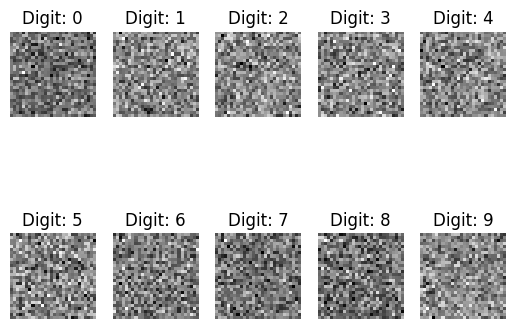

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize the images to [-1, 1] range
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)

# Define some constants
BUFFER_SIZE = 60000
BATCH_SIZE = 128
NOISE_DIM = 100
NUM_CLASSES = 10
EPOCHS = 10000
SAVE_INTERVAL = 1000


def build_generator():
    noise_input = layers.Input(shape=(NOISE_DIM,))
    label_input = layers.Input(shape=(NUM_CLASSES,))

    merged_input = layers.Concatenate()([noise_input, label_input])

    x = layers.Dense(256)(merged_input)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization(momentum=0.8)(x)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization(momentum=0.8)(x)
    x = layers.Dense(1024)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization(momentum=0.8)(x)
    x = layers.Dense(np.prod((28, 28, 1)), activation='tanh')(x)
    img = layers.Reshape((28, 28, 1))(x)

    model = models.Model([noise_input, label_input], img)
    return model

def build_discriminator():
    img_input = layers.Input(shape=(28, 28, 1))
    label_input = layers.Input(shape=(NUM_CLASSES,))

    # Flatten the image input
    flat_img = layers.Flatten()(img_input)

    # Concatenate flattened image and label inputs
    merged_input = layers.Concatenate()([flat_img, label_input])

    x = layers.Dense(512)(merged_input)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    validity = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model([img_input, label_input], validity)
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    noise_input = layers.Input(shape=(NOISE_DIM,))
    label_input = layers.Input(shape=(NUM_CLASSES,))
    img = generator([noise_input, label_input])
    validity = discriminator([img, label_input])
    model = models.Model([noise_input, label_input], validity)
    return model






# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build the generator
generator = build_generator()

# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Training function
def train(epochs, batch_size=128, save_interval=200):
    # Load and preprocess the data
    X_train = x_train
    y_train_cat = y_train

    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs, labels = X_train[idx], y_train_cat[idx]

        noise = np.random.normal(0, 1, (batch_size, NOISE_DIM))
        gen_labels = np.random.randint(0, NUM_CLASSES, batch_size)
        gen_labels_cat = tf.keras.utils.to_categorical(gen_labels, NUM_CLASSES)

        gen_imgs = generator.predict([noise, gen_labels_cat])

        d_loss_real = discriminator.train_on_batch([imgs, labels], valid)
        d_loss_fake = discriminator.train_on_batch([gen_imgs, gen_labels_cat], fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, NOISE_DIM))
        sampled_labels = np.random.randint(0, NUM_CLASSES, batch_size)
        sampled_labels_cat = tf.keras.utils.to_categorical(sampled_labels, NUM_CLASSES)

        g_loss = gan.train_on_batch([noise, sampled_labels_cat], valid)

        # Print the progress
        if epoch % save_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")
            save_imgs(epoch)

def save_imgs(epoch):
    r, c = 2, 5
    noise = np.random.normal(0, 1, (r * c, NOISE_DIM))
    sampled_labels = np.arange(0, NUM_CLASSES).reshape(-1, 1)
    sampled_labels_cat = tf.keras.utils.to_categorical(sampled_labels, NUM_CLASSES)
    gen_imgs = generator.predict([noise, sampled_labels_cat])

    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].set_title(f"Digit: {cnt}")
            axs[i, j].axis('off')
            cnt += 1
    plt.show()

# Train the GAN
train(EPOCHS, BATCH_SIZE, SAVE_INTERVAL)


Below is code attempting to create comparable SRGANs, now it has errors

In [1]:
# Below is code for SRGANS attempting to be comparable to the CGANS model

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset (for super-resolution purposes, downsample first)
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize images to [-1, 1] range and expand dimensions
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

# Create low-resolution images by downsampling (14x14) and upsampling back to 28x28
x_train_lr = tf.image.resize(x_train, (14, 14))
x_train_lr = tf.image.resize(x_train_lr, (28, 28))

# Define constants
BATCH_SIZE = 128
EPOCHS = 10000
SAVE_INTERVAL = 1000

# Generator for SRGAN (takes low-resolution images and outputs high-resolution images)
def build_sr_generator():
    img_input = layers.Input(shape=(28, 28, 1))

    x = layers.Conv2D(64, kernel_size=3, strides=1, padding='same')(img_input)
    x = layers.LeakyReLU(alpha=0.2)(x)
    for _ in range(3):
        x = layers.Conv2D(64, kernel_size=3, strides=1, padding='same')(x)
        x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Conv2D(1, kernel_size=3, strides=1, padding='same', activation='tanh')(x)

    model = models.Model(img_input, x)
    return model

# Discriminator for SRGAN (distinguishes real high-res images from generated high-res images)
def build_sr_discriminator():
    img_input = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(64, kernel_size=3, strides=2, padding='same')(img_input)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    validity = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(img_input, validity)
    return model

# Compile models
discriminator_sr = build_sr_discriminator()
discriminator_sr.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

generator_sr = build_sr_generator()

# Build combined SRGAN model
img_lr_input = layers.Input(shape=(28, 28, 1))
generated_hr = generator_sr(img_lr_input)
validity = discriminator_sr(generated_hr)

srgan = models.Model(img_lr_input, validity)
srgan.compile(loss='binary_crossentropy', optimizer='adam')

# Training function for SRGAN
def train_srgan(epochs, batch_size=128, save_interval=200):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        imgs_hr, imgs_lr = x_train[idx], x_train_lr[idx]

        # Generate high-resolution images from low-resolution input
        gen_imgs_hr = generator_sr.predict(imgs_lr)

        # Train discriminator
        d_loss_real = discriminator_sr.train_on_batch(imgs_hr, valid)
        d_loss_fake = discriminator_sr.train_on_batch(gen_imgs_hr, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        g_loss = srgan.train_on_batch(imgs_lr, valid)

        if epoch % save_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")
            save_sr_images(epoch)

def save_sr_images(epoch):
    r, c = 2, 5
    idx = np.random.randint(0, x_train.shape[0], r * c)
    imgs_lr = x_train_lr[idx]
    gen_imgs_hr = generator_sr.predict(imgs_lr)

    gen_imgs_hr = 0.5 * gen_imgs_hr + 0.5
    imgs_lr = 0.5 * imgs_lr + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs_hr[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()

# Train SRGAN
train_srgan(EPOCHS, BATCH_SIZE, SAVE_INTERVAL)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got array([31476, 41831, 52164, 17262,  3563, 22711,  6774, 26576,  9953,
       36438, 38408, 20687, 20132, 46820, 35151, 27855,  2240, 49401,
       29917, 42502, 22607, 13758,  6876, 34210, 41741, 45825, 12142,
       18738, 51960, 27570, 51608, 22549, 47825, 56783, 24034, 10388,
       33027, 11384, 43477, 24625, 16546, 56804, 29188, 15603, 53558,
       25642, 40660, 28902,  1950, 47227, 23762, 17125, 37929, 53750,
        3449, 22176,  6859,  5970, 58320, 19713, 15074, 49541, 35053,
       51487, 26844, 42224, 31183, 27782, 54405, 59839, 53459, 11281,
       32120, 13010, 48203,  6317, 40177, 47865, 40649, 40792, 28306,
       17723, 43323, 23594,   756, 54531, 41213, 10911,  4912, 27412,
       48638, 57167,  8813, 14886, 22063, 22604, 41977, 39085, 35265,
       51806,  4222, 33667, 23968, 21975, 55124,  5260, 24082, 54967,
       12042, 20667, 45276, 29646, 44469, 52928, 38672, 55587, 31669,
       23185, 49639, 56436, 11219, 16307, 19326, 54130, 25787, 57271,
        8421, 31532])